July 23 - Correlation
============
* Correlation
* Linear regression
* Scatter Matrix
* Correlation Matrix

CWK: Compute and plot the correlation matrices for temperature and precipitation (two separate matrices) between New York, Philadelphia, Newark and Boston using the 2005-2015 time record and then visualize them. Then compute the correlation between temperature and precipitation for each city and plot temperature vs. precipitation with the best fit line for the cities with the highest correlation between them.  Submit these graphs and a paragraph discussing whether the timeseries and regional patterns support these correlations, with references back to the graphs and previous work to support your assertions. 


In [1]:

import pandas as pd
import numpy as np

import city
data_path = "C:\\Users\\story645\\Desktop\\EAS213_2015\\571549.csv"
df = pd.read_csv(data_path)
nyc = city.filter_city(df,"NY US")


C:\Users\story645\Anaconda\lib\site-packages\pandas\core\series.py:632: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  self.where(~key, value, inplace=True)


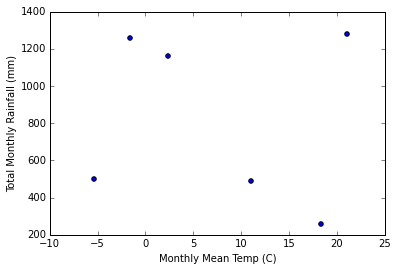

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc['MNTM']/10,nyc['TPCP']) #rescale
ax.set_xlabel("Monthly Mean Temp (C)") #Label!
ax.set_ylabel("Total Monthly Rainfall (mm)") 

In [3]:
import scipy.stats as st
#http://pandas.pydata.org/pandas-docs/stable/computation.html
print nyc['MNTM'].corr(nyc['TPCP'])
#http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
print st.pearsonr(nyc['MNTM'], nyc['TPCP'])

-0.106962078839
(-0.1069620788389032, 0.84016875223335818)


Now compute correlation for:
* total precip vs extreme precip
* temperature vs. snow depth
* one other variable pair of your choice (2015 dataset)

In [4]:
#linear regressions? 
slope, intercept, _, _, _ = st.linregress(nyc['MNTM'], nyc['TPCP'])
print slope, intercept


-0.452111374194 857.563889759


(-53.333333333333336, 210.5)

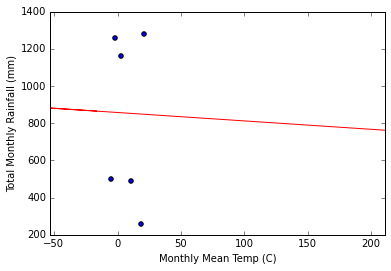

In [9]:
#makes more sense when superimposed on graph:
#Also called plotting a best fit line

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc['MNTM']/10,nyc['TPCP'])
ax.set_xlabel("Monthly Mean Temp (C)") #Label!
ax.set_ylabel("Total Monthly Rainfall (mm)") 

#y = mx+b = slope*x+intercept
ax.plot(nyc['MNTM'], slope*nyc['MNTM']+intercept, color="red")

ax.set_xlim((nyc['MNTM'].min(),nyc['MNTM'].max()))#restrict axes range

Now plot scatter+best fit line for:
* total precip vs average precip
* temperature vs. snow depth
* one other variable pair of your choice (2015 dataset)

In [34]:
#how about seeing how all the variables relate?
#and restrict columns
pd.scatter_matrix?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000043AE4588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000004B729390>]], dtype=object)

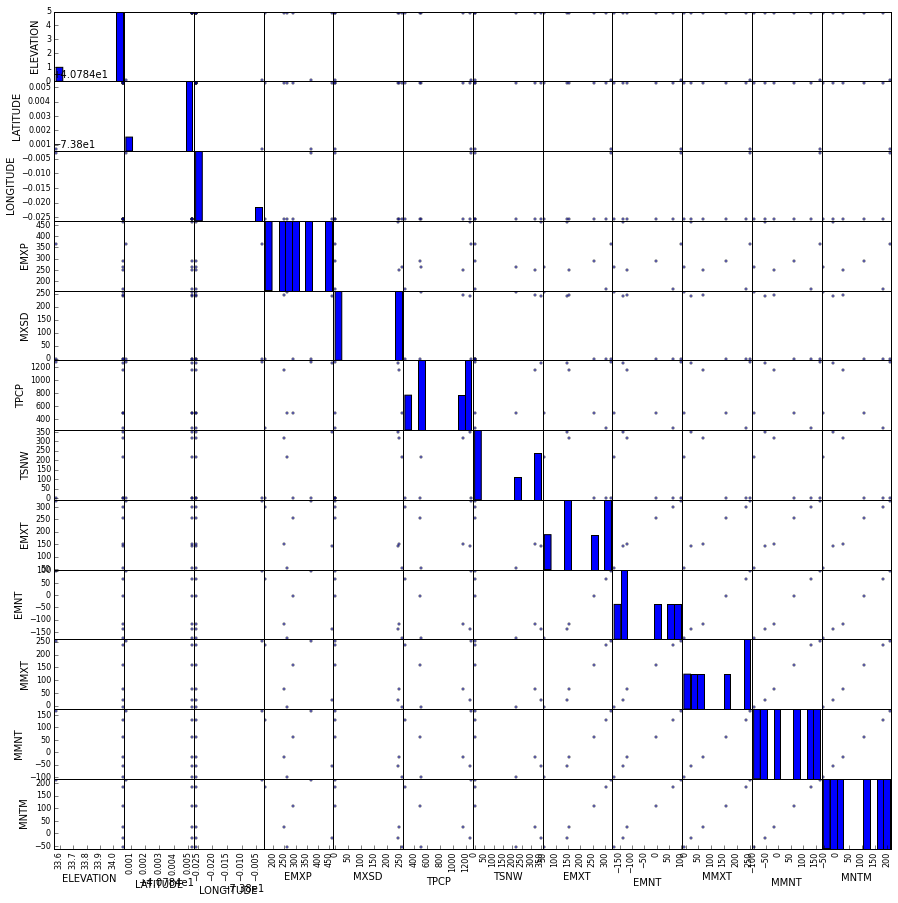

In [35]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
#lists of columns can be used to filter data by column
pd.scatter_matrix(nyc, ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004FD197B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000546585C0>]], dtype=object)

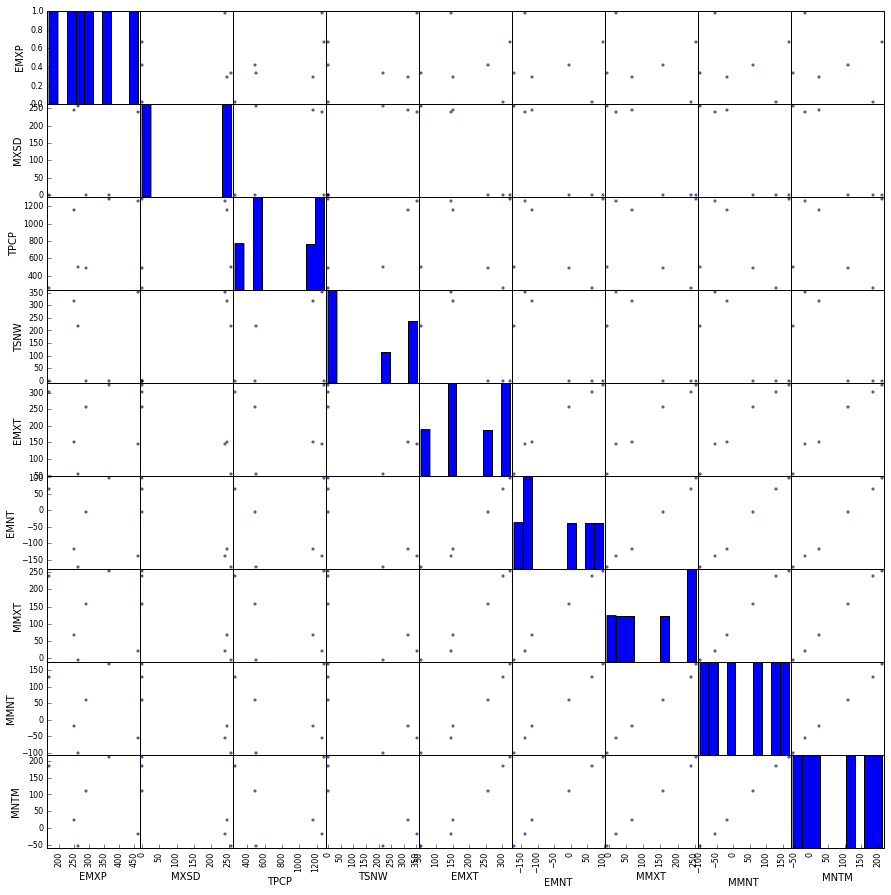

In [36]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
#lists of columns can be used to filter data by column
pd.scatter_matrix(nyc[city.datakeys], ax=ax)

In [18]:
#what about data that isn't in a dataframe?
boston = city.filter_city(df, "MA US")
philly = city.filter_city(df, "PA US")
newark = city.filter_city(df, "NJ US")

In [37]:
#well just make a dataframe
import numpy as np
raw_data = np.vstack((nyc['MNTM'], boston['MNTM'],
                         philly['MNTM'],newark['MNTM']))
cities =["NYC","Boston","Philadelphia","Newark"]
MNTM = pd.DataFrame(raw_data.T, columns=cities)
print MNTM

          NYC      Boston  Philadelphia      Newark
0  -16.500000  -47.826087    -25.230769  -21.384615
1  -53.333333  -90.130435    -54.769231  -53.153846
2   23.666667   -5.086957     21.538462   23.000000
3  109.833333   81.913043    112.615385  114.307692
4  183.500000  168.347826    195.000000  195.692308
5  210.500000  179.333333    219.333333  217.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004FB9E898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000058C3E2E8>]], dtype=object)

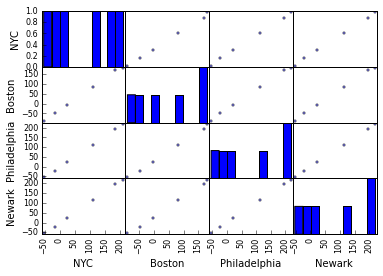

In [38]:
fig = plt.figure()
fig.suptitle("Mean Monthly Temperature")
ax = fig.add_subplot(1,1,1)
pd.scatter_matrix(MNTM, ax=ax)

Now try plotting the scatter matrix of the variables for the other 3 cities

In [26]:
#what about the correlations of these things?
nyc_corr = nyc[city.datakeys].corr()
print nyc_corr

          EMXP      MXSD      TPCP      TSNW      EMXT      EMNT      MMXT  \
EMXP  1.000000  0.248142  0.742275  0.383567 -0.132385 -0.211089 -0.280285   
MXSD  0.248142  1.000000  0.334769  0.954724 -0.932903 -0.948412 -0.936566   
TPCP  0.742275  0.334769  1.000000  0.491290 -0.055486 -0.134840 -0.152273   
TSNW  0.383567  0.954724  0.491290  1.000000 -0.808431 -0.878857 -0.866773   
EMXT -0.132385 -0.932903 -0.055486 -0.808431  1.000000  0.978433  0.976263   
EMNT -0.211089 -0.948412 -0.134840 -0.878857  0.978433  1.000000  0.995589   
MMXT -0.280285 -0.936566 -0.152273 -0.866773  0.976263  0.995589  1.000000   
MMNT -0.196503 -0.920863 -0.059969 -0.833878  0.983908  0.994699  0.995349   
MNTM -0.238903 -0.930167 -0.106962 -0.851972  0.981151  0.996379  0.998863   

          MMNT      MNTM  
EMXP -0.196503 -0.238903  
MXSD -0.920863 -0.930167  
TPCP -0.059969 -0.106962  
TSNW -0.833878 -0.851972  
EMXT  0.983908  0.981151  
EMNT  0.994699  0.996379  
MMXT  0.995349  0.998863  
MMN

<matplotlib.colorbar.Colorbar instance at 0x0000000042C24A08>

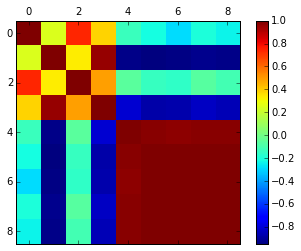

In [27]:
#visualize?
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.matshow(nyc_corr)
fig.colorbar(im)

<matplotlib.colorbar.Colorbar instance at 0x00000000439F39C8>

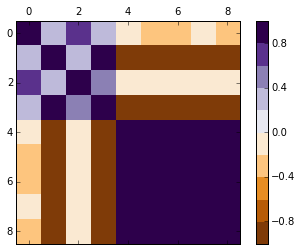

In [33]:
#clean up colors
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

cmap = mcm.PuOr
#data ranges from 233.747 307.738
norm = mcolors.BoundaryNorm(np.arange(-1,1.2,.2), cmap.N)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.matshow(nyc_corr, cmap=cmap, norm=norm)
fig.colorbar(im)

<matplotlib.colorbar.Colorbar instance at 0x0000000059E1FAC8>

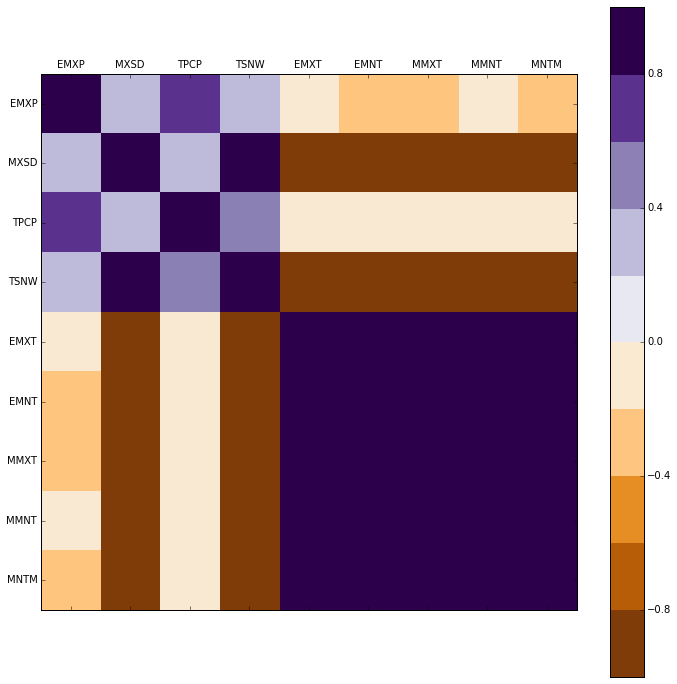

In [44]:
#clean up colors
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

cmap = mcm.PuOr
#data ranges from 233.747 307.738
norm = mcolors.BoundaryNorm(np.arange(-1,1.2,.2), cmap.N)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
im = ax.matshow(nyc_corr, cmap=cmap, norm=norm)
ax.set_xticks(range(len(city.datakeys)))
ax.set_xticklabels(city.datakeys)
ax.set_yticks(range(len(city.datakeys)))
ax.set_yticklabels(city.datakeys)
fig.colorbar(im)

Try plotting correlation matrices for the variables-1 matrix per city

In [39]:
ax.matshow??